# Flights Data Exploration

## Preliminary Wrangling

This document explores a dataset containing Flights and Records for approximately 14 million Flight record over 29 Attribute.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
# load in the dataset into a pandas dataframe, print statistics
flights_2004 = pd.read_csv('2004.csv')
flights_2008 = pd.read_csv('2008.csv')
merged_set = flights_2004.append(flights_2008)


In [8]:
merged_set.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,...,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [9]:
# high-level overview of data shape and composition
print(flights_2004.shape)
print(flights_2008.shape)
print(merged_set.shape)

(7129270, 29)
(7009728, 29)
(14138998, 29)


In [10]:
#Checking for duplicated rows
#flights_2004.duplicated().sum() #10 Duplicates
flights_2008.duplicated().sum() #4 Duplicates

4

In [11]:
#Dropping Duplicates from 2004 and 2008 
flights_2004.drop_duplicates(inplace=True)
flights_2008.drop_duplicates(inplace=True)
merged_set.drop_duplicates(inplace=True)

In [12]:
#checking number of nulls
merged_set.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                264001
CRSDepTime                  0
ArrTime                293188
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 83492
ActualElapsedTime      296238
CRSElapsedTime            844
AirTime                296238
ArrDelay               296238
DepDelay               264001
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     13873788
Diverted                    0
CarrierDelay          5484991
WeatherDelay          5484991
NASDelay              5484991
SecurityDelay         5484991
LateAircraftDelay     5484991
dtype: int64

In [13]:
# descriptive statistics for numeric variables
print(flights_2004.describe())

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7129260.0  7.129260e+06  7.129260e+06  7.129260e+06  7.001505e+06   
mean      2004.0  6.549741e+00  1.576378e+01  3.943601e+00  1.346557e+03   
std          0.0  3.437391e+00  8.801830e+00  1.986255e+00  4.736454e+02   
min       2004.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2004.0  4.000000e+00  8.000000e+00  2.000000e+00  9.360000e+02   
50%       2004.0  7.000000e+00  1.600000e+01  4.000000e+00  1.331000e+03   
75%       2004.0  1.000000e+01  2.300000e+01  6.000000e+00  1.735000e+03   
max       2004.0  1.200000e+01  3.100000e+01  7.000000e+00  2.750000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.129260e+06  6.987721e+06  7.129260e+06  7.129260e+06   
mean   1.340792e+03  1.496638e+03  1.503662e+03  2.091410e+03   
std    4.623599e+02  4.950191e+02  4.768854e+02  1.954997e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.0000

In [14]:
print(flights_2008.describe())

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7009724.0  7.009724e+06  7.009724e+06  7.009724e+06  6.873478e+06   
mean      2008.0  6.375132e+00  1.572801e+01  3.924181e+00  1.333830e+03   
std          0.0  3.406736e+00  8.797066e+00  1.988260e+00  4.780689e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  9.280000e+02   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.325000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.728000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.009724e+06  6.858075e+06  7.009724e+06  7.009724e+06   
mean   1.326086e+03  1.481258e+03  1.494801e+03  2.224201e+03   
std    4.642509e+02  5.052251e+02  4.826728e+02  1.961716e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.0000

In [15]:
print(merged_set.describe())

               Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  1.413898e+07  1.413898e+07  1.413898e+07  1.413898e+07  1.387498e+07   
mean   2.005983e+03  6.463175e+00  1.574604e+01  3.933973e+00  1.340252e+03   
std    1.999929e+00  3.423341e+00  8.799486e+00  1.987273e+00  4.758844e+02   
min    2.004000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.004000e+03  4.000000e+00  8.000000e+00  2.000000e+00  9.320000e+02   
50%    2.004000e+03  6.000000e+00  1.600000e+01  4.000000e+00  1.329000e+03   
75%    2.008000e+03  9.000000e+00  2.300000e+01  6.000000e+00  1.731000e+03   
max    2.008000e+03  1.200000e+01  3.100000e+01  7.000000e+00  2.750000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.413898e+07  1.384580e+07  1.413898e+07  1.413898e+07   
mean   1.333501e+03  1.489020e+03  1.499269e+03  2.157244e+03   
std    4.633567e+02  5.001595e+02  4.797838e+02  1.959456e+03   
min    0.000000e+00  1.00000

In [16]:
merged_set.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [17]:
merged_set.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


### What is the structure of your dataset?

Now, there are rows of flight data in the dataset with 29 features originally.
Variable descriptions Name Description.<br/>
1 Year 2008.<br/>
2 Month 1-12.<br/>
3 DayofMonth 1-31.<br/>
4 DayOfWeek 1 (Monday) - 7 (Sunday).<br/>
5 DepTime actual departure time (local, hhmm).<br/>
6 CRSDepTime scheduled departure time (local, hhmm).<br/>
7 ArrTime actual arrival time (local, hhmm).<br/>
8 CRSArrTime scheduled arrival time (local, hhmm).<br/>
9 UniqueCarrier unique carrier code.<br/>
10 FlightNum flight number.<br/>
11 TailNum plane tail number.<br/>
12 ActualElapsedTime (actual) in minutes.<br/>
13 CRSElapsedTime (scheduled) in minutes.<br/>
14 AirTime in minutes 15 ArrDelay (Difference in minutes between scheduled and actual arrival time).<br/>
16 DepDelay (Difference in minutes between scheduled and actual departure time. ).<br/>
17 ArrDelay (Difference in minutes between scheduled and actual Arrival time.)<br/>
18 Origin origin IATA airport code.<br/>
19 Diverted (Planes Diverting from main track)<br/>
20 TaxiOut taxi out time, in minutes.<br/>
21 CarrierDelay in minutes.<br/>
22 WeatherDelay in minutes.<br/>
23 NASDelay (National Air System Delay) in minutes.<br/>
24 SecurityDelay in minutes.<br/>
25 LateAircraftDelay in minutes.<br/>
26 Distance (Flight Distance) <br/>
27 Cancellation code (Code associated with each cancelled ticket)<br/>
28 TaxiIn Taxi in time in minutes<br/>
### What is/are the main feature(s) of interest in your dataset?

I'm interested into comparing Flight carriers over the years 2004 and 2008 to see if their delays decreased or not and also compare them on number of flights per carrier. also my main insight would be what is the best time to fly and the factors affecting flight delays 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Carrier Delay, Weather Delay, Distance, Unique Carriers, Dep and Arr Delays, dep and Arr Times also might need to know which week day or month have the most crowded flights.

## Univariate Exploration

Focusing on knowing which day/month is the most crowded with flights each year and if it's affecting delays.

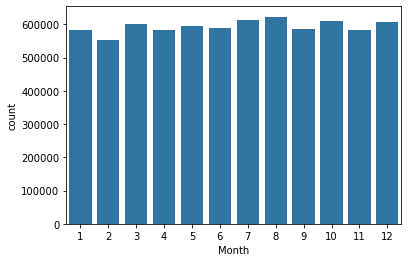

In [20]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, flights_2004['Month'].max()+binsize, binsize)
base = sb.color_palette()[0]
sb.countplot(data=flights_2004, x = 'Month', color = base);

Previous Graph shows that Months 8,10 and 12 are the most crowded months of the year while 2 is the best month to fly on Depending on the 2000 flights dataset. Maybe adding a log scale would help us see the differences

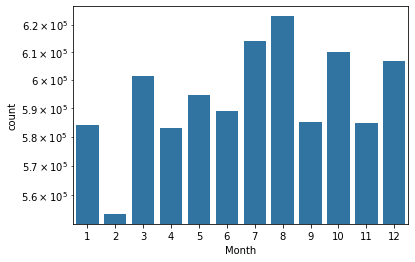

In [22]:
sb.countplot(data=flights_2004, x = 'Month', color = base );
plt.yscale('log')

Adding log Transformation made it clear that Month 8 is the most crowded and month 2 is the least crowded month with flights.
Now let's compare 2004 and 2008 and the combined set to see if it differs over years

Text(0.5, 1.0, 'Both')

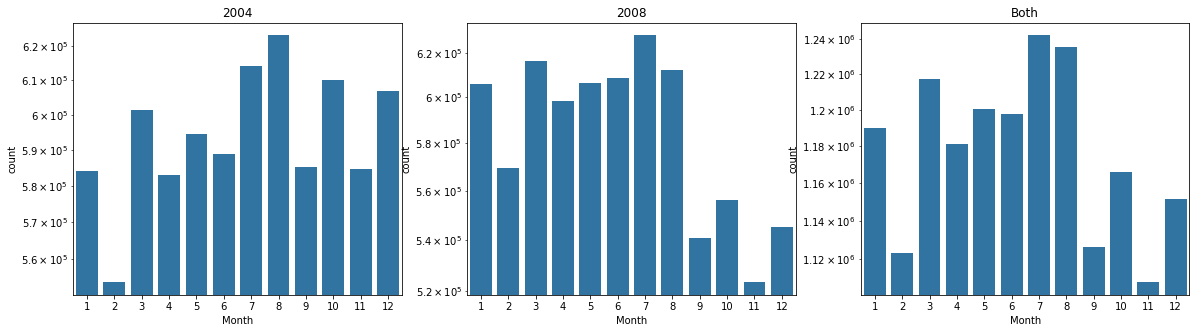

In [23]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.countplot(data=flights_2004, x = 'Month', color = base );
plt.yscale('log')
plt.title('2004')
plt.subplot(1,3,2)
sb.countplot(data=flights_2008, x = 'Month', color = base );
plt.yscale('log')
plt.title('2008')
plt.subplot(1,3,3)
sb.countplot(data=merged_set, x = 'Month', color = base );
plt.yscale('log')
plt.title('Overall')


Previous shows that even tho 2004 and 2008 distribution is different combining them together shows that both months 11 and 2 are the best to flight on since they're not crowded as the rest of the year.

Not Let's See if days of the week can give us a better intuition on when to fly without delays/crowd. 
since we don't have data about Day of week on the 2000 dataset we'll be comparing only 2004 and 2008 this time to see if there is any difference in crowd.

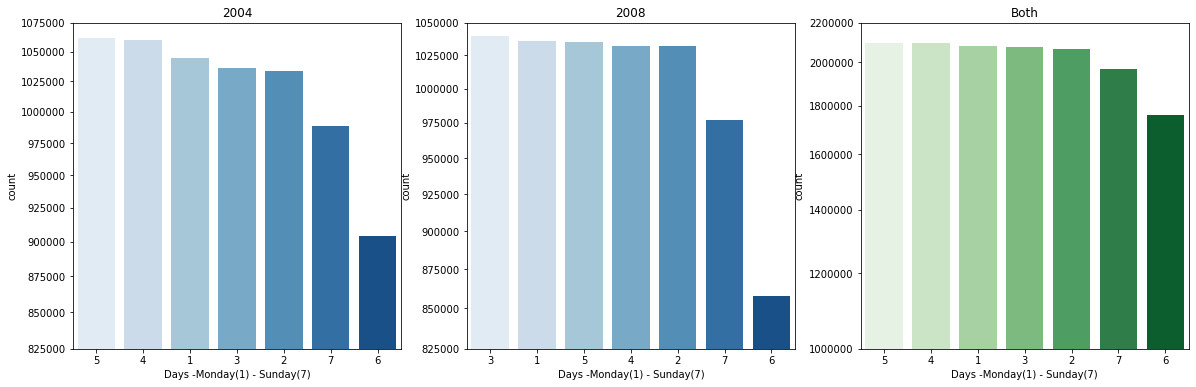

In [30]:
from pandas.api.types import CategoricalDtype

plt.figure(figsize=[20,6])

plt.subplot(1, 3, 3)
ordered_cat=[5,4,1,3,2,7,6]
cat_type=CategoricalDtype(categories = ordered_cat, ordered=True)
merged_set['DayOfWeek'] = merged_set['DayOfWeek'].astype(cat_type)
sb.countplot(data=merged_set, x='DayOfWeek', palette = 'Greens');
yticks =[1000000, 1200000, 1400000, 1600000, 1800000, 2000000, 2200000]
plt.yscale('log'); #Log Scaling shows that Saturday and sunday are the least crowded days of the week.
plt.yticks(yticks,yticks);
plt.xlabel('Days -Monday(1) - Sunday(7)');
plt.title('Both');

plt.subplot(1, 3, 2)
ordered_cat=[3,1,5,4,2,7,6]
cat_type=CategoricalDtype(categories = ordered_cat, ordered=True)
flights_2008['DayOfWeek'] = flights_2008['DayOfWeek'].astype(cat_type)
sb.countplot(data=flights_2008, x='DayOfWeek', palette = 'Blues');
yticks =[825000, 850000, 875000, 900000, 925000, 950000, 975000, 1000000, 1025000, 1050000]
plt.yscale('log'); #Log Scaling shows that Saturday and sunday are the least crowded days of the week.
plt.yticks(yticks,yticks);
plt.xlabel('Days -Monday(1) - Sunday(7)');
plt.title('2008');

plt.subplot(1, 3, 1)
ordered_cat=[5,4,1,3,2,7,6]
cat_type=CategoricalDtype(categories = ordered_cat, ordered=True)
flights_2004['DayOfWeek'] = flights_2004['DayOfWeek'].astype(cat_type)
sb.countplot(data=flights_2004, x='DayOfWeek',  palette = 'Blues');
yticks =[825000, 850000, 875000, 900000, 925000, 950000, 975000, 1000000, 1025000, 1050000,1075000]
plt.yscale('log'); #Log Scaling shows that Saturday and sunday are the least crowded days of the week.
plt.yticks(yticks,yticks);
plt.xlabel('Days -Monday(1) - Sunday(7)');
plt.title('2004');

The Distribution in 2004 is much better than 2008 the graph shows that during work days flights became much more crowded than weekend Days (Saturday), added a y log scale to make the observation more clear for day 6 and 7 as it wasn't visible that they're much less without the transformation. also when combining the datasets we can clearly say sunday and saturday are the days you should travel on comfortably.

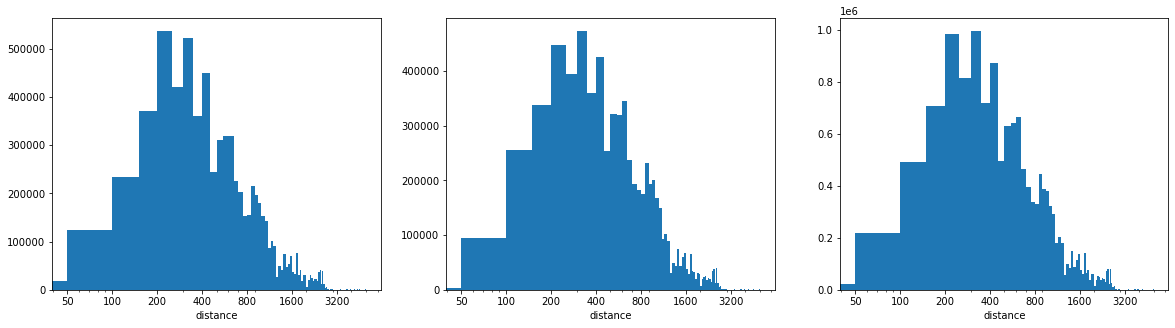

In [33]:
#Notice There are really few flights over 3000 Miles
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
bins = np.arange(0, flights_2004['Distance'].max()+50, 50)
plt.hist(data = flights_2004, x = "Distance", bins = bins);
xticks = [50,100,200,400, 800, 1600, 3200]
plt.xlabel("distance");
plt.xscale('log'); #original Graph was greatly left skewed so i had to do a log transformation 
plt.xticks(xticks,xticks);

plt.subplot(1,3,2)
bins = np.arange(0, flights_2008['Distance'].max()+50, 50)
plt.hist(data = flights_2008, x = "Distance", bins = bins);
xticks = [50,100,200,400, 800, 1600, 3200]
plt.xlabel("distance");
plt.xscale('log'); #original Graph was greatly left skewed so i had to do a log transformation 
plt.xticks(xticks,xticks);

plt.subplot(1,3,3)
bins = np.arange(0, merged_set['Distance'].max()+50, 50)
plt.hist(data = merged_set, x = "Distance", bins = bins);
xticks = [50,100,200,400, 800, 1600, 3200]
plt.xlabel("distance");
plt.xscale('log'); #original Graph was greatly left skewed so i had to do a log transformation 
plt.xticks(xticks,xticks);

In the distance graph we can see three of them are almost identical to each other but number of Distances > 3000 are really few so we can count those as outliers

Text(0.5, 1.0, 'Combined')

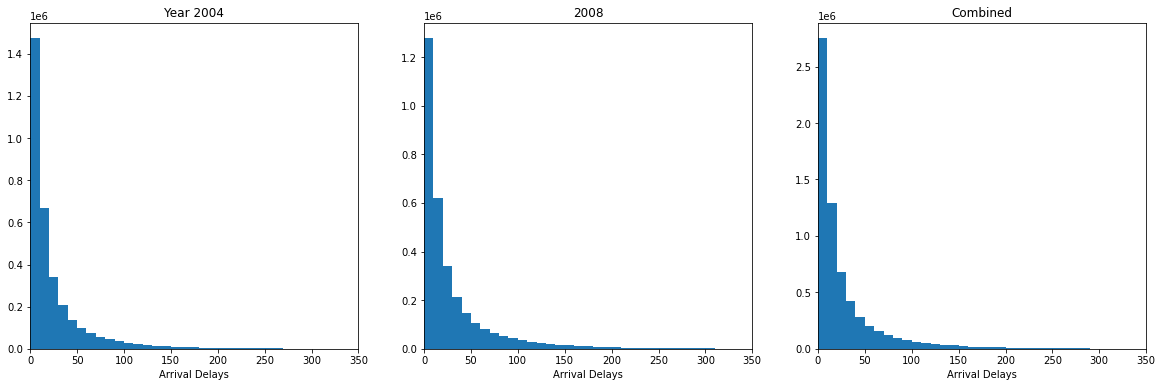

In [34]:
plt.figure(figsize=[20,6])


plt.subplot(1, 3, 1)
bins = np.arange(0, flights_2004['ArrDelay'].max()+10, 10)
plt.hist(data = flights_2004, x = "ArrDelay", bins = bins);
plt.xlabel("Arrival Delays");
plt.xlim(0,350)
plt.title('Year 2004')

plt.subplot(1, 3, 2)
bins = np.arange(0, flights_2008['ArrDelay'].max()+10, 10)
plt.hist(data = flights_2008, x = "ArrDelay", bins = bins);
plt.xlabel("Arrival Delays");
plt.xlim(0,350)
plt.title('2008')

plt.subplot(1, 3, 3)
bins = np.arange(0, merged_set['ArrDelay'].max()+10, 10)
plt.hist(data = merged_set, x = "ArrDelay", bins = bins);
plt.xlabel("Arrival Delays");
plt.xlim(0,350)
plt.title('Combined')

Arrival Delays > 200 minutes in 2008 increased than 2004 this might be caused by weather or other factors on this year, overall average on the combined graph is around 200 or less delay we can count anything higher than a 200minute Delay as an outlier also. Now let's check Department delays.

Text(0.5, 1.0, 'Combined')

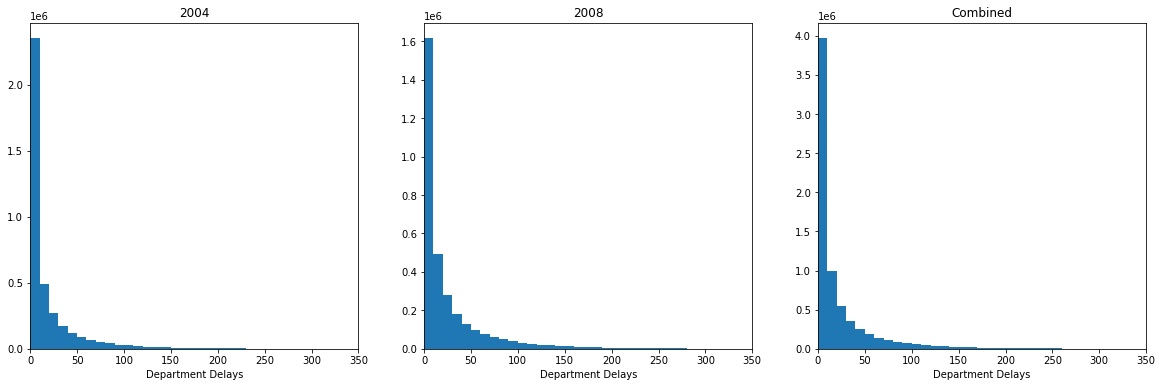

In [35]:
plt.figure(figsize=[20,6])
plt.subplot(1, 3, 1)
bins = np.arange(0, flights_2004['DepDelay'].max()+10, 10)
plt.hist(data = flights_2004, x = "DepDelay", bins = bins);
plt.xlabel("Department Delays");
plt.xlim(0,350)
plt.title('2004');

plt.subplot(1, 3, 2)
bins = np.arange(0, flights_2008['DepDelay'].max()+10, 10)
plt.hist(data = flights_2008, x = "DepDelay", bins = bins);
plt.xlabel("Department Delays");
plt.xlim(0,350)
plt.title('2008');

plt.subplot(1, 3, 3)
bins = np.arange(0, merged_set['DepDelay'].max()+10, 10)
plt.hist(data = merged_set, x = "DepDelay", bins = bins);
plt.xlabel("Department Delays");
plt.xlim(0,350)
plt.title('Combined');


Department Delays Follows Arrival Delay's graph pattern, my guess is that there is a strong correlation between those factors we might investigate later on Bivariate Exploration

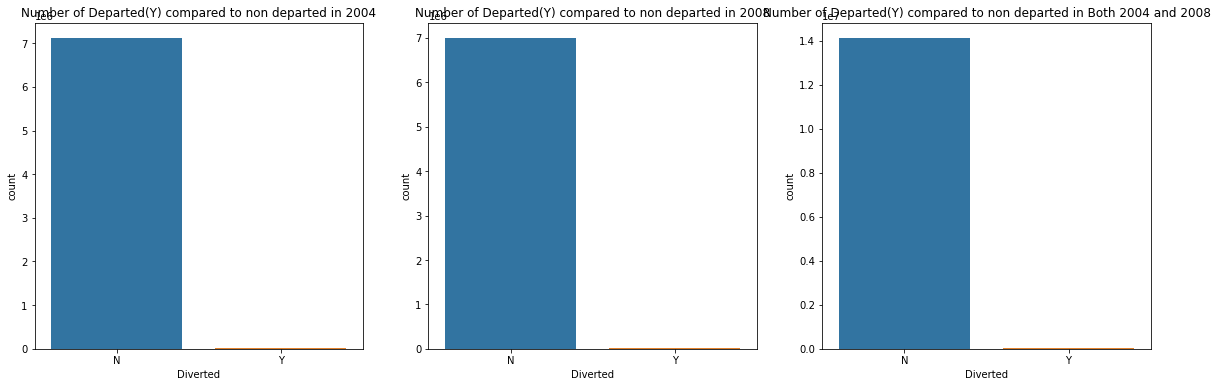

In [36]:
plt.figure(figsize=[20,6])

plt.subplot(1, 3, 1)
xticks=['N', 'Y']
g = sb.countplot(data = flights_2004, x = "Diverted");
plt.title("Number of Departed(Y) compared to non departed in 2004");
g.set(xticks=range(len(xticks)), xticklabels=[i[0] for i in xticks]);

plt.subplot(1, 3, 2)
xticks=['N', 'Y']
g = sb.countplot(data = flights_2008, x = "Diverted");
plt.title("Number of Departed(Y) compared to non departed in 2008");
g.set(xticks=range(len(xticks)), xticklabels=[i[0] for i in xticks]);

plt.subplot(1, 3, 3)
xticks=['N', 'Y']
g = sb.countplot(data = merged_set, x = "Diverted");
plt.title("Number of Departed(Y) compared to non departed in Both 2004 and 2008");
g.set(xticks=range(len(xticks)), xticklabels=[i[0] for i in xticks]);

Number of diverted flights shows that very few flights divert out of course which assumes that mostly this isn't affecting Delays or crowds which is our main investigation.

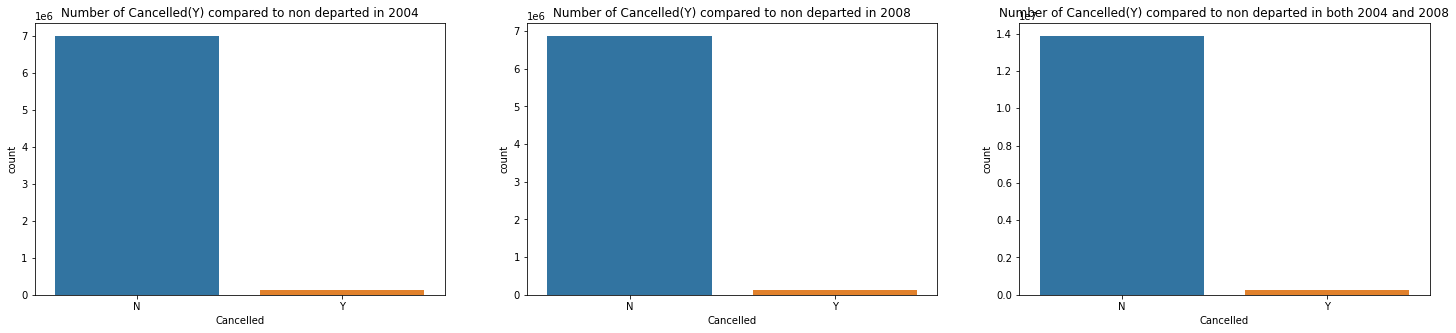

In [40]:
plt.figure(figsize=[25,5])

plt.subplot(1, 3, 1)
xticks=['N', 'Y']
g = sb.countplot(data = flights_2004, x = "Cancelled");
plt.title("Number of Cancelled(Y) compared to non departed in 2004");
g.set(xticks=range(len(xticks)), xticklabels=[i[0] for i in xticks]);

plt.subplot(1, 3, 2)
xticks=['N', 'Y']
g = sb.countplot(data = flights_2008, x = "Cancelled");
plt.title("Number of Cancelled(Y) compared to non departed in 2008");
g.set(xticks=range(len(xticks)), xticklabels=[i[0] for i in xticks]);

plt.subplot(1, 3, 3)
xticks=['N', 'Y']
g = sb.countplot(data = merged_set, x = "Cancelled");
plt.title("Number of Cancelled(Y) compared to non departed in both 2004 and 2008");
g.set(xticks=range(len(xticks)), xticklabels=[i[0] for i in xticks]);

#Shows that the number of cancelled flights on 2000 is greater than 2004 and 2008 which indicates improvement

Number of Cancelled trips showing That most flights do fly rather than cancelling so delays or weather effect rarely leads to flight cancellation. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

People tend to fly during winter/summer. also flights do not divert or get cancelled frequently, Department delays and Arrival delays in 2008 are a bit higher than 2004 this will be more clear later on, the data has a few distance outliers above 3200 they're very very few flights so we'd consider them outliers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Didn't think i'd need to use log transformation to see which month/day/distance more clearly but without log transformation they seem so close and unclear. CRSElapsed time has a really strong relationship with ArrTimes

## Bivariate Exploration

>We'll further investigate on Bivariate relations from now on.

>To start off with, I want to look at the pairwise correlations present between features in the data.

In [51]:
numeric_vars = ['DepTime', 'ArrTime', 'ArrDelay', 'DepDelay', 'AirTime', 'CRSArrTime', 'CRSElapsedTime','ActualElapsedTime','WeatherDelay']
categoric_vars = ['Year', 'Month', 'DayofMonth', 'DayOfWeek','UniqueCarrier', ]

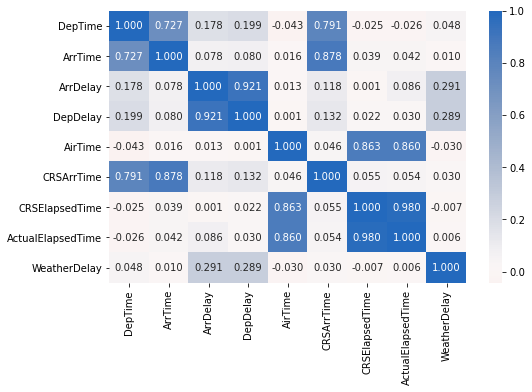

In [52]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(merged_set[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

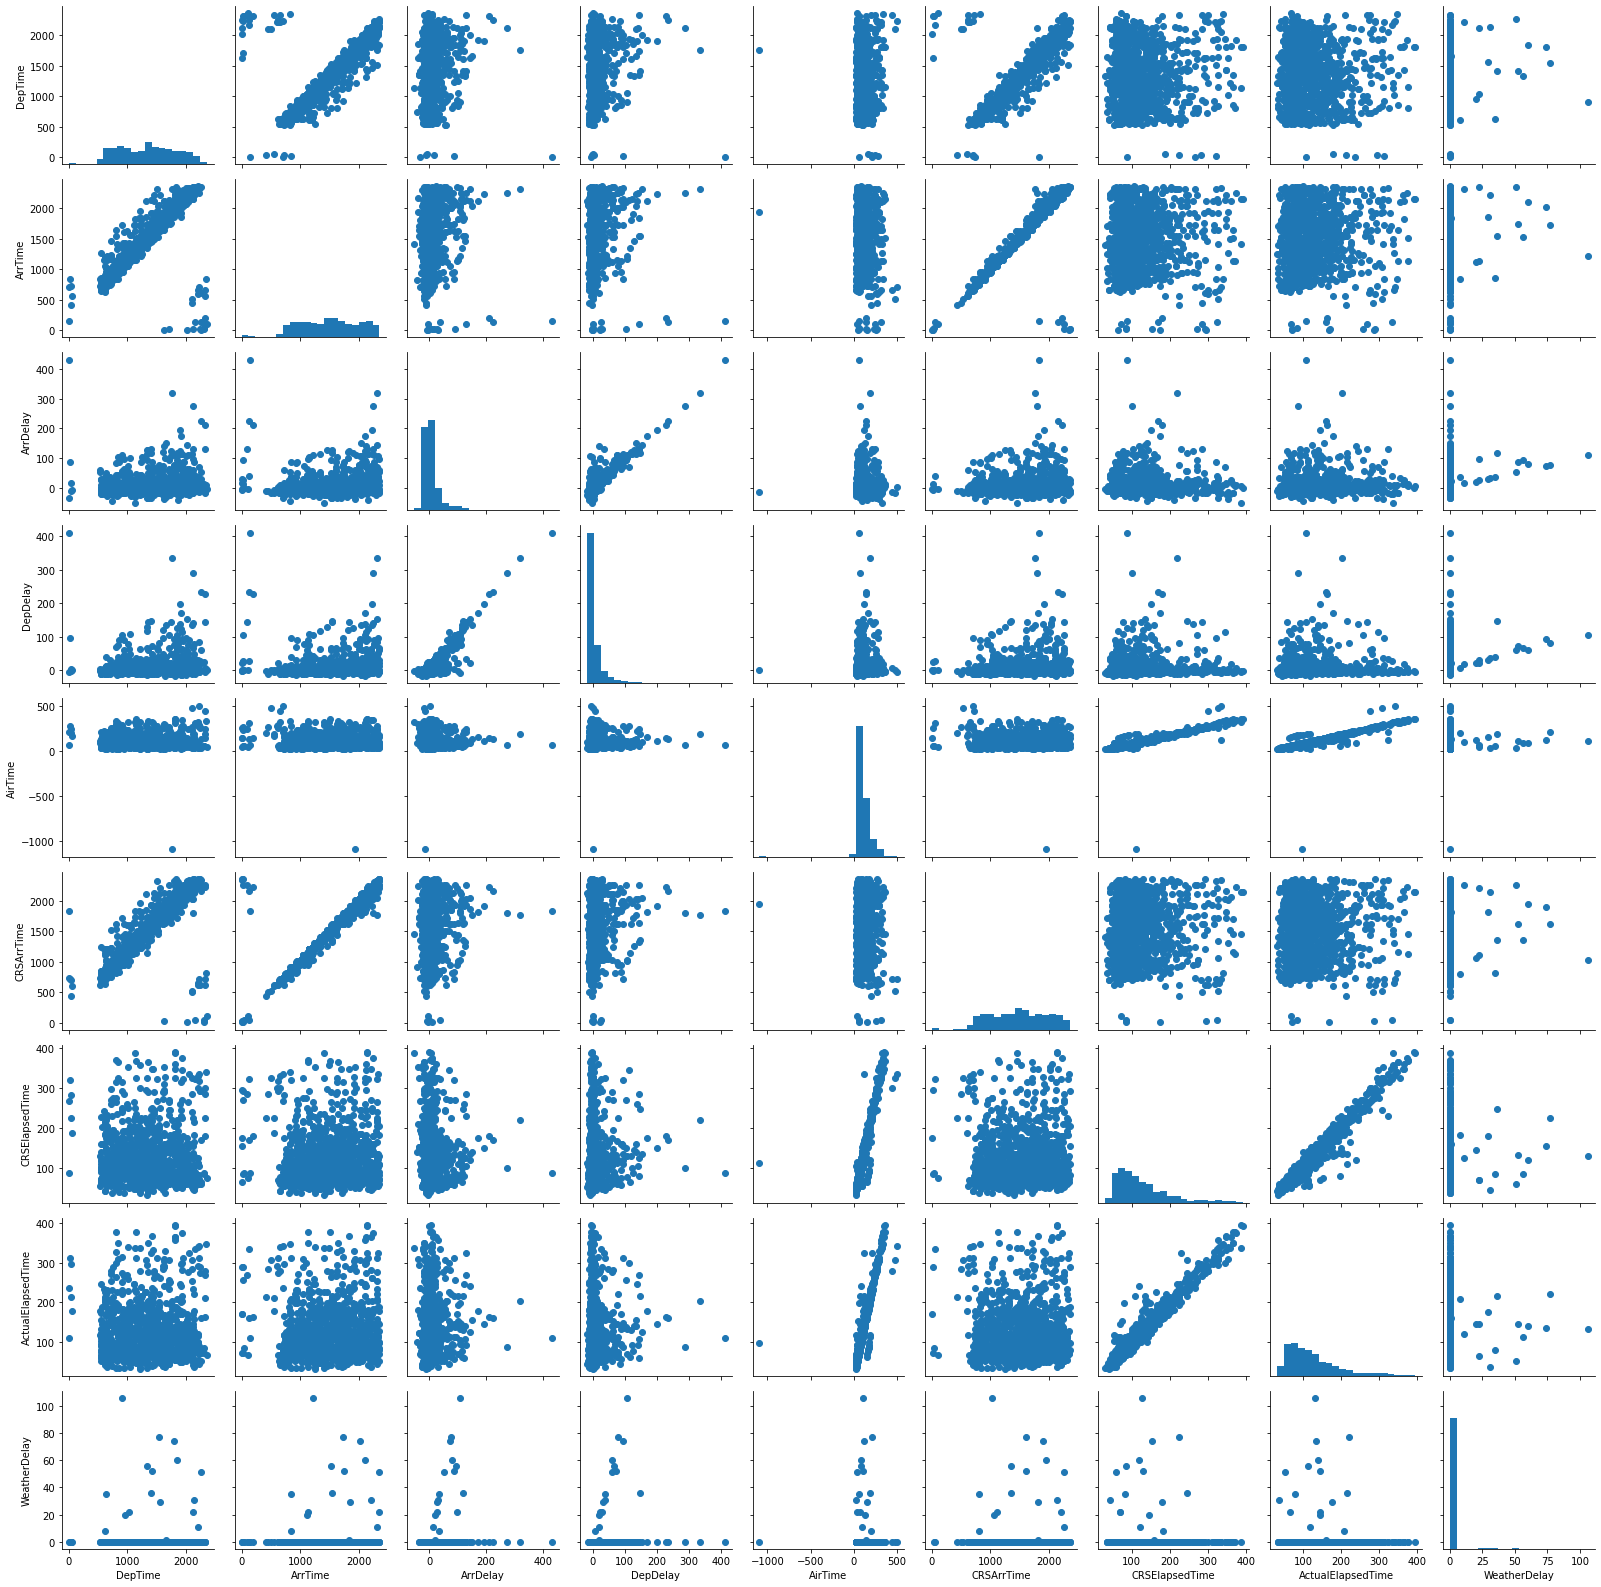

In [53]:
# plot matrix: sample 500 Flights so that plots are clearer and
# they render faster

g = sb.PairGrid(data = merged_set.sample(1000), vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.scatterplot(data= flights_2004, x='ArrDelay', y='DepDelay', alpha = 0.2);
plt.xlim(-200,1700);
plt.ylim(-200,1700);
plt.title('Year 2004');
plt.subplot(1,3,2)
sb.scatterplot(data= flights_2008, x='ArrDelay', y='DepDelay', alpha = 0.2);
plt.xlim(-200,1700);
plt.ylim(-200,1700);
plt.title('Year 2008');
plt.subplot(1,3,3)
sb.scatterplot(data= merged_set, x='ArrDelay', y='DepDelay', alpha = 0.2);
plt.xlim(-200,1700);
plt.ylim(-200,1700);
plt.title('Both Years');

As expected, the Delays, Times, and Weather dimensions are all correlated with one another, We'll need to further investigate if crowd affects delays also to reach a conclusion on which is the best time to travel so far we know that a saturday or a sunday on month 2 or 8 is the best to travel on.

Let's move on to looking at how Delays correlate with the categorical variables.

C:\Users\moham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\Anacond

<Figure size 720x720 with 0 Axes>

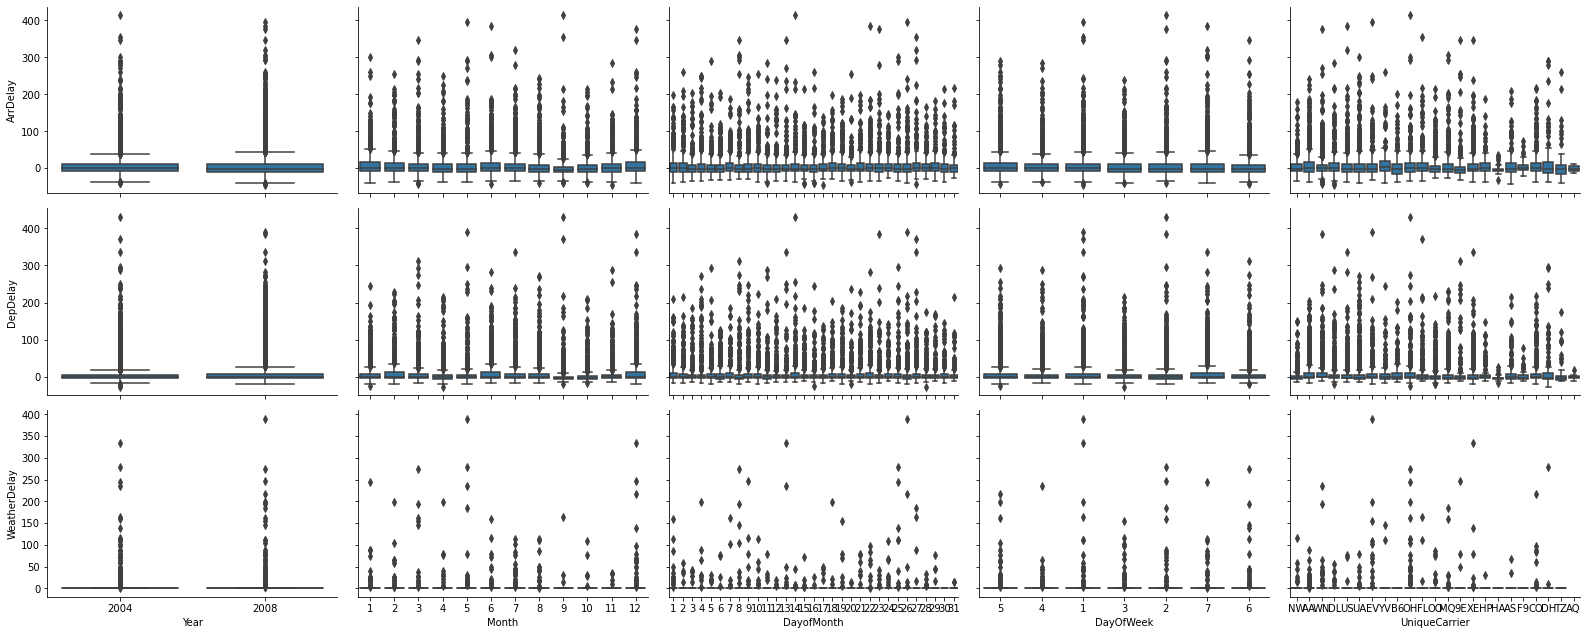

In [56]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = base);

plt.figure(figsize = [10, 20])
g = sb.PairGrid(data = merged_set.sample(10000), y_vars = ['ArrDelay', 'DepDelay', 'WeatherDelay'], x_vars = categoric_vars,
                height = 3, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=90)
plt.show();

Interestingly, it appears that there are some negative relationships between the categorical variables and the Three numeric variables of interest. also it's interesting to notice that some unique carriers have almost no weather delays also specific months have much fewer department delays

Finally, let's look at relationships between the three categorical features.

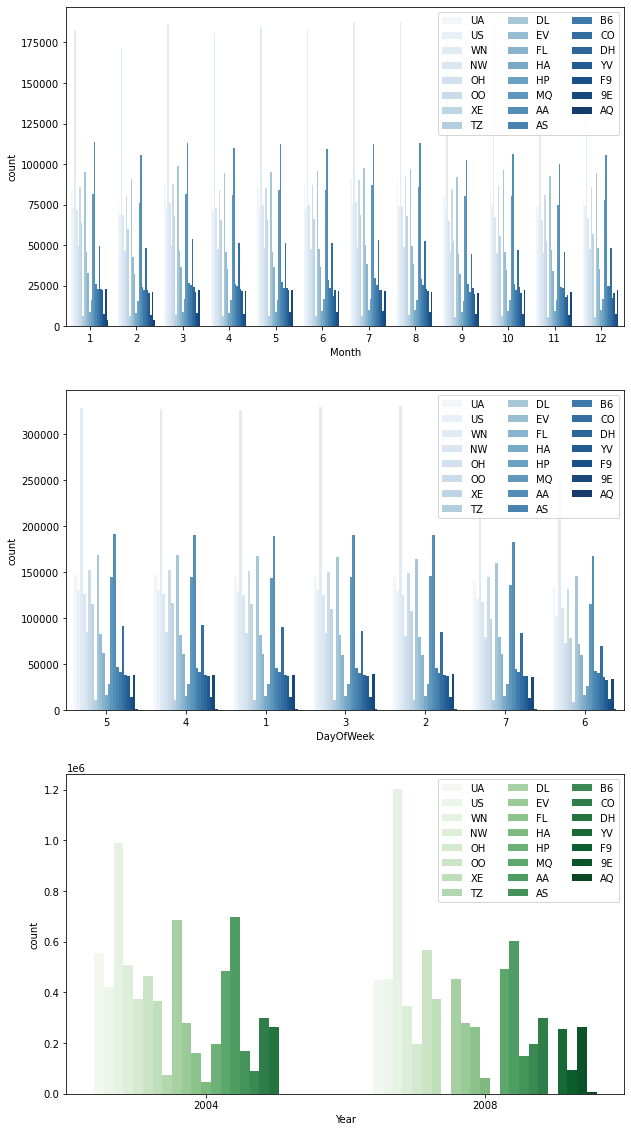

In [65]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 20])

# subplot 1: Month vs WeatherDelay
ax = plt.subplot(3, 1, 1)
sb.countplot(data = merged_set, x = 'Month', hue = 'UniqueCarrier', palette = 'Blues')
ax.legend(loc = 1, ncol = 3) 
# subplot 2: DayofMonth vs. WeatherDelay
ax = plt.subplot(3, 1, 2)
sb.countplot(data = merged_set, x = 'DayOfWeek', hue = 'UniqueCarrier', palette = 'Blues')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = merged_set, x = 'Year', hue = 'UniqueCarrier', palette = 'Greens')
ax.legend(loc = 1, ncol = 3) # re-arrange legend to remove overlapping

plt.show()

Distribution of carriers over months/days/years is almost the same except for years there is a visible difference in distribution of carrier over the years. we can investigate further about the Unique carriers and see if they help also check which has the most delays

Text(0.5, 1.0, 'combined')

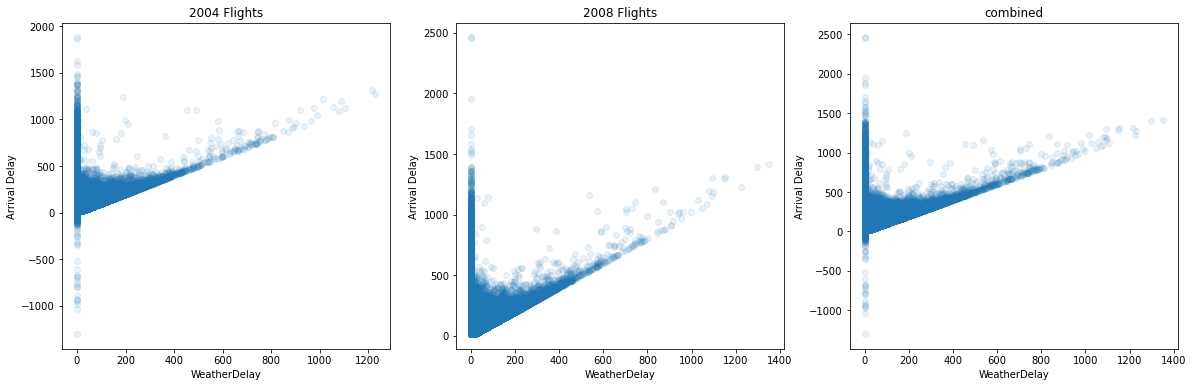

In [71]:
# scatter plot of Weather Delay vs. Arrival Delays.

plt.figure(figsize = [20, 6])
plt.subplot(1,3,1)
plt.scatter(data = flights_2004, x = 'WeatherDelay', y = 'ArrDelay', alpha = 1/10)
plt.xlabel('WeatherDelay')
plt.ylabel('Arrival Delay')
plt.title('2004 Flights')
plt.subplot(1,3,2)
plt.scatter(data = flights_2008, x = 'WeatherDelay', y = 'ArrDelay', alpha = 1/10)
plt.xlabel('WeatherDelay')
plt.ylabel('Arrival Delay')
plt.title('2008 Flights')
plt.subplot(1,3,3)
plt.scatter(data = merged_set, x = 'WeatherDelay', y = 'ArrDelay', alpha = 1/10)
plt.xlabel('WeatherDelay')
plt.ylabel('Arrival Delay')
plt.title('combined')

Weather Affected flights much more in 2008 than 2004 which is clearly visible on the prev graph. also combined dataset shows a small correlation weather has a great factor on delays and it is to be considered when to fly!

Now, let's take a second look at which months are the most affected by weather.

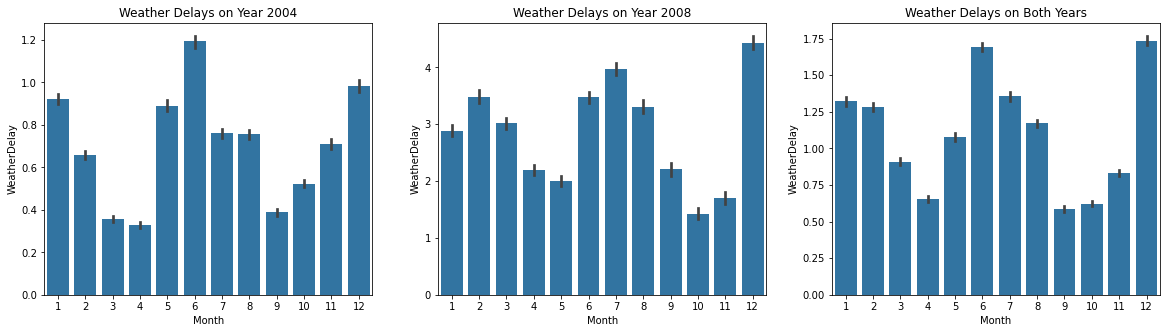

In [72]:
#Plotting Weather delays on each month on every year
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.barplot(data = flights_2004, x='Month', y='WeatherDelay', color=base);
plt.title('Weather Delays on Year 2004');
plt.subplot(1,3,2)
sb.barplot(data = flights_2008, x='Month', y='WeatherDelay', color=base);
plt.title('Weather Delays on Year 2008');
plt.subplot(1,3,3)
sb.barplot(data = merged_set, x='Month', y='WeatherDelay', color=base);
plt.title('Weather Delays on Both Years');

worst season to travel are summer and winter apparently months 3,4,9,10 are the best to take a flight on, but knowing that month 11 is the least crowded month also having this much weather delay indicates a red flag to travelling on November/December.

C:\Users\moham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\Anacond

<Figure size 720x1440 with 0 Axes>

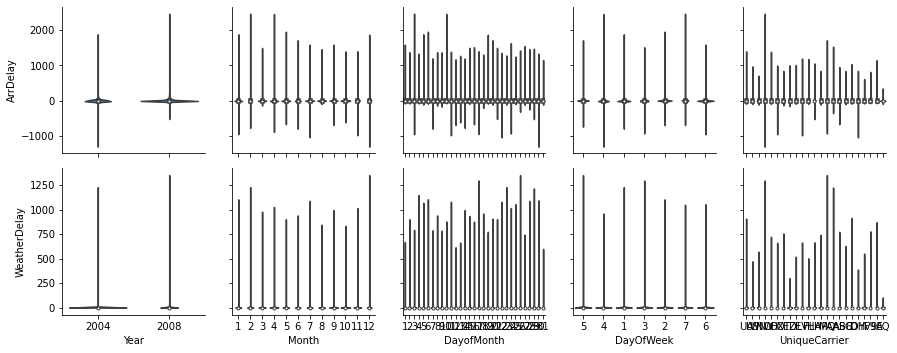

In [73]:
#replotting with a violin grid on full data and removing the Department Delay focusing on arrival delays only because it affects people more than department delays
def violingrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.violinplot(x, y, color = base);

plt.figure(figsize = [10, 20])
g = sb.PairGrid(data = merged_set, y_vars = ['ArrDelay', 'WeatherDelay'], x_vars = categoric_vars);
g.map(violingrid);
plt.xticks(rotation=90)
plt.show();

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the carriers with highest delays suffer mostly from great weather delays. also saturday and sunday have lots of weather delays but still they're the best to travel on due to low crowd on those days.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Arrival delays and Department delays had a high amout of correlation,
CRSelapsedtime and ActualElapsedTime Had a HUGE corr of 0.980. weather delay corr was low but it does affect the delays the graphs shows months with higher weather delay tend to have a high overall delay to flights. also surprisingly weather affected flights on 2008 way more than it did in 2004. also noticed that carrier distribution wasn't even. some carriers wasn't crowded in 2008 as much as 2004. let's add some final touches to the investigation on the next section!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Even tho Department delay affects Arrival delays greatly, Department delays correlation on arrival time isn't that high which indicates that even tho department may delay the delay can be fixed during the flight to arrive as close as possible to the arrival time.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between Delay and Times.

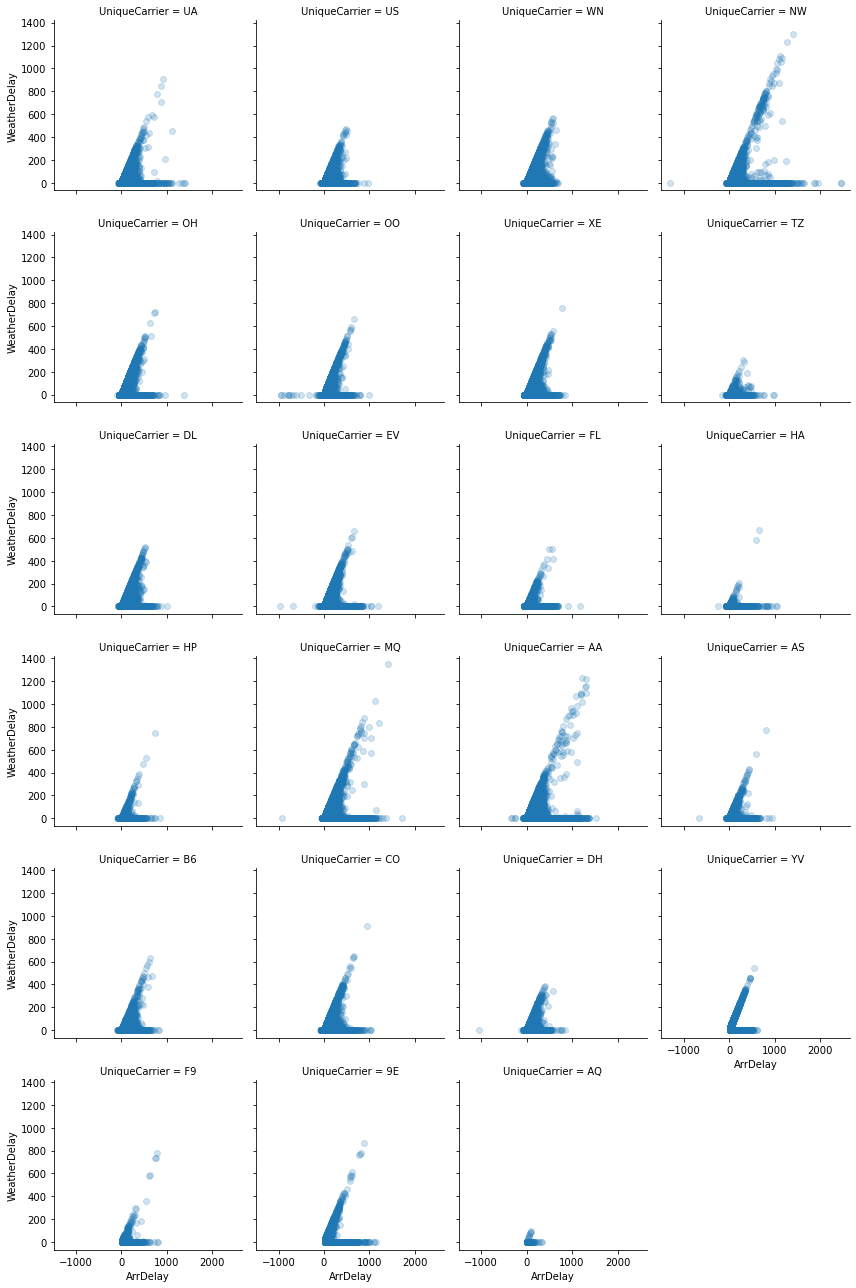

In [74]:
g = sb.FacetGrid(data=merged_set, col='UniqueCarrier', col_wrap=4);
g.map(plt.scatter, 'ArrDelay', 'WeatherDelay', alpha=1/5);
# plt.yscale('log')

Some carriers have Arrival Delays low while having high WeatherDelays which indicates also the carrier has a high effect on comfortable stress-free travelling

In [83]:
#grouping top 10 Carriers with delays
print(merged_set['UniqueCarrier'].value_counts())

WN    2192158
AA    1303433
DL    1139569
OO    1030600
UA    1005327
MQ     973781
US     873508
NW     854938
XE     742213
CO     597784
OH     570953
EV     559436
FL     424240
AS     318094
B6     285924
DH     264955
9E     262208
YV     254930
HP     195939
HA     109903
F9      95758
TZ      75533
AQ       7800
Name: UniqueCarrier, dtype: int64


In [88]:
ordinal_var_dict = {'UniqueCarrier' : ['WN', 'AA', 'DL', 'OO', 'UA','MQ','US', 'NW', 'XE', 'CO']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        merged_set[var] = merged_set[var].astype(ordered_var)
    else: # pre-v0.21
        merged_set[var] = merged_set[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

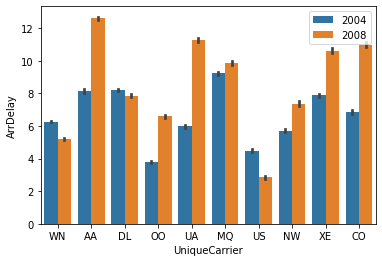

In [91]:
sb.barplot(data = merged_set,x='UniqueCarrier', y='ArrDelay', hue='Year');
plt.legend(loc='best');

US Carrier has the lowest Arrival delays which shows that they're handling department delays with excellence.

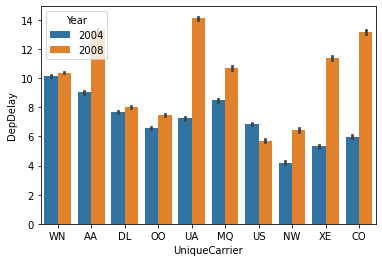

In [92]:
sb.barplot(data = merged_set,x='UniqueCarrier', y='DepDelay', hue='Year');

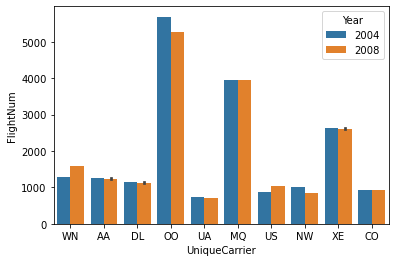

In [93]:
sb.barplot(data = merged_set,x='UniqueCarrier', y='FlightNum', hue='Year');

From previous Three plots we can see that US and WN Carriers did a good job on decreasing the gap between Department and Arrival delay.
Also hands down OO is the best carrier to travel on looking at the number of flights it has compared to the delays it has the highest number of flights with almost the least number of delays! 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Dpartment against arrival Delays in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of carrier efficiency, also proved that What matters is arrival time since there is some carriers reduce the gap between department and arrival times for their flights. the real problem is if the flight did not arrive at the desired time. focused more on arrival delays and checked that WN and US and OO are the best Carries when it comes to arriving on time!

### Were there any interesting or surprising interactions between features?
Surprisingly some Carriers did a better job on 2004 than 2008 while they had the better technology on 2008.

In [ ]:
merged_set.to_csv('Combined.csv')